In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

100%|██████████| 262M/262M [00:02<00:00, 109MB/s]

Extracting files...


# Micro-level Data from Kaggle

In [4]:
#  Get data
data = pd.read_csv(f"{path}/vehicles.csv", index_col=0)

#### Data Pre-Processing & Preliminary Examination:

In [5]:
data

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600


In [6]:
data.dtypes

,0
url,object
region,object
region_url,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object


In [7]:
data.columns.tolist(),

(['url',
  'region',
  'region_url',
  'price',
  'year',
  'manufacturer',
  'model',
  'condition',
  'cylinders',
  'fuel',
  'odometer',
  'title_status',
  'transmission',
  'VIN',
  'drive',
  'size',
  'type',
  'paint_color',
  'image_url',
  'description',
  'county',
  'state',
  'lat',
  'long',
  'posting_date'],)

In [8]:
data.shape

(426880, 25)

In [9]:
data.isnull().sum()

,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013


In [10]:
# Select relevant columns for car price prediction
relevant_columns = [
    'price', 'year', 'manufacturer', 'model', 'condition',
    'cylinders', 'fuel', 'odometer', 'title_status',
    'transmission', 'drive', 'type', 'paint_color', 'state'
]

# Filter the dataset to retain only relevant columns
data_filtered = data[relevant_columns]

# Display the structure and first few rows of the filtered dataset
filtered_info = {
    "Shape After Filtering": data_filtered.shape,
    "Columns Retained": data_filtered.columns.tolist(),
    "Sample Data": data_filtered.head()
}

filtered_info

{'Shape After Filtering': (426880, 14),
 'Columns Retained': ['price',
  'year',
  'manufacturer',
  'model',
  'condition',
  'cylinders',
  'fuel',
  'odometer',
  'title_status',
  'transmission',
  'drive',
  'type',
  'paint_color',
  'state'],
 'Sample Data':             price  year manufacturer model condition cylinders fuel  odometer  \
 id                                                                              
 7222695916   6000   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
 7218891961  11900   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
 7221797935  21000   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
 7222270760   1500   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
 7210384030   4900   NaN          NaN   NaN       NaN       NaN  NaN       NaN   
 
            title_status transmission drive type paint_color state  
 id                                                                 
 7222695916          

In [11]:
# Identify columns with missing values
missing_values = data_filtered.isnull().sum()
missing_percent = (missing_values / len(data_filtered)) * 100

# Create a DataFrame summarizing missing values
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Missing Percentage (%)': missing_percent.values
})

# Filter columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Sort by percentage of missing values
missing_summary = missing_summary.sort_values(by='Missing Percentage (%)', ascending=False)
missing_summary

,Column,Missing Values,Missing Percentage (%)
5,cylinders,177678,41.622470
4,condition,174104,40.785232
10,drive,130567,30.586347
12,paint_color,130203,30.501078
11,type,92858,21.752717
2,manufacturer,17646,4.133714
8,title_status,8242,1.930753
3,model,5277,1.236179
7,odometer,4400,1.030735
6,fuel,3013,0.705819


-  since the original dataset is large, the missing data will not be replaced but removed before proceeding with the analysis.


In [12]:
# Drop rows where any column has null (NaN) values
data_filtered_no_nulls = data_filtered.dropna()

# Display the shape of the dataset after removing rows with any null values
cleaning_info_dropna = {
    "Original Rows": len(data_filtered),
    "Rows Removed Due to Any Null": len(data_filtered) - data_filtered_no_nulls.shape[0],
    "Remaining Rows": data_filtered_no_nulls.shape[0]
}

cleaning_info_dropna

{'Original Rows': 426880,
 'Rows Removed Due to Any Null': 310892,
 'Remaining Rows': 115988}

In [13]:
# Identify columns with missing values
missing_values = data_filtered_no_nulls.isnull().sum()
missing_percent = (missing_values / len(data_filtered_no_nulls)) * 100

# Create a DataFrame summarizing missing values
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Missing Percentage (%)': missing_percent.values
})

# Filter columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Sort by percentage of missing values
missing_summary = missing_summary.sort_values(by='Missing Percentage (%)', ascending=False)

# Check that all missing values have been removed
missing_summary

,Column,Missing Values,Missing Percentage (%)


## Getting rid of Outliers

In [14]:
# Detecting outliers using IQR for 'price' and 'odometer'
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [15]:
# Outlier detection for 'price' and 'odometer'
price_outliers = detect_outliers(data_filtered_no_nulls, 'price')
odometer_outliers = detect_outliers(data_filtered_no_nulls, 'odometer')

In [16]:
odometer_outliers

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
id,,,,,,,,,,,,,,
7313478091,27990,2014.0,ram,2500 4x4,like new,6 cylinders,diesel,2222222.0,clean,automatic,4wd,truck,white,al
7312878239,0,2014.0,ram,2500 slt 4x4,like new,6 cylinders,diesel,1111111.0,clean,automatic,4wd,truck,white,al
7312876423,17990,2018.0,ford,edge sel,like new,6 cylinders,gas,1111111.0,clean,automatic,fwd,SUV,blue,al
7312873290,0,2018.0,chevrolet,silverado 3500 ltz 4x4,like new,8 cylinders,diesel,1111111.0,clean,automatic,4wd,truck,black,al
7312857247,0,2012.0,ram,3500 slt,like new,6 cylinders,diesel,1111111.0,clean,automatic,rwd,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316335910,5500,2006.0,chevrolet,silverado 1500,good,8 cylinders,gas,369000.0,clean,automatic,4wd,pickup,red,wi
7314288173,2450,2007.0,toyota,corolla,good,4 cylinders,gas,299999.0,clean,manual,fwd,sedan,grey,wi
7313056158,1900,2006.0,toyota,corolla,fair,4 cylinders,gas,290000.0,clean,automatic,fwd,sedan,silver,wi


In [17]:
price_outliers

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
id,,,,,,,,,,,,,,
7315345469,50000,2019.0,toyota,tundra,like new,8 cylinders,gas,20010.0,clean,automatic,4wd,truck,white,al
7315259946,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,rwd,convertible,red,al
7314956487,72900,2021.0,chevrolet,tahoe,good,8 cylinders,gas,19129.0,clean,automatic,4wd,SUV,grey,al
7314293077,48900,2018.0,chevrolet,silverado 2500 hd ltz,like new,8 cylinders,diesel,43034.0,rebuilt,automatic,4wd,truck,black,al
7311384869,49990,2015.0,ford,super duty f-550 drw,good,8 cylinders,diesel,152701.0,clean,automatic,4wd,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303328987,49995,2018.0,ford,expedition,good,6 cylinders,gas,56848.0,clean,automatic,4wd,SUV,black,wy
7303328988,54995,2020.0,mercedes-benz,gle-class,good,4 cylinders,gas,14426.0,clean,automatic,4wd,SUV,black,wy
7303328841,52995,2019.0,ford,f250,good,8 cylinders,gas,31558.0,clean,automatic,4wd,truck,white,wy


In [18]:
# Remove outliers
data_filtered_no_outliers = data_filtered_no_nulls[~data_filtered_no_nulls.index.isin(price_outliers.index)]
data_filtered_no_outliers = data_filtered_no_nulls[~data_filtered_no_nulls.index.isin(odometer_outliers.index)]

In [19]:
data_filtered_no_outliers = data_filtered_no_outliers[data_filtered_no_outliers.price < 1000000]

In [20]:
data_filtered_no_outliers

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
id,,,,,,,,,,,,,,
7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
7316304717,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
7316285779,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
7316257769,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301952155,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,wy
7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,wy
7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy


## Categorical Data Encoding

In [21]:
# Encoding categorical variables with Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']

label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data_filtered_no_outliers[col] = label_encoders[col].fit_transform(data_filtered_no_outliers[col])

# Select relevant features for car price prediction
features = ['year', 'odometer', 'manufacturer', 'condition', 'cylinders',
            'fuel', 'transmission', 'drive', 'type', 'paint_color']
target = 'price'

final_data = data_filtered_no_outliers[features + [target]]

# Display the shape and first few rows of the final dataset
final_info = {
    "Shape After Processing": final_data.shape,
    "Sample Data": final_data.head()
}

final_info

{'Shape After Processing': (114870, 11),
 'Sample Data':               year  odometer  manufacturer  condition  cylinders  fuel  \
 id                                                                       
 7316356412  2013.0  128000.0            13          0          5     2   
 7316343444  2012.0   68696.0            14          2          6     2   
 7316304717  2016.0   29499.0             7          2          5     2   
 7316285779  2019.0   43000.0            38          0          5     2   
 7316257769  2016.0   17302.0             7          2          5     2   
 
             transmission  drive  type  paint_color  price  
 id                                                         
 7316356412             0      2    10            0  15000  
 7316343444             2      0     8            0  27990  
 7316304717             2      0     8            9  34590  
 7316285779             0      0    10            5  35000  
 7316257769             2      0     8            8

In [22]:
final_data

,year,odometer,manufacturer,condition,cylinders,fuel,transmission,drive,type,paint_color,price
id,,,,,,,,,,,
7316356412,2013.0,128000.0,13,0,5,2,0,2,10,0,15000
7316343444,2012.0,68696.0,14,2,6,2,2,0,8,0,27990
7316304717,2016.0,29499.0,7,2,5,2,2,0,8,9,34590
7316285779,2019.0,43000.0,38,0,5,2,0,0,10,5,35000
7316257769,2016.0,17302.0,7,2,5,2,2,0,8,8,29990
...,...,...,...,...,...,...,...,...,...,...,...
7301952155,2020.0,7701.0,6,2,5,2,2,1,7,0,48590
7301951544,2017.0,41664.0,18,2,6,2,0,0,7,0,39990
7301949190,2016.0,55612.0,18,2,6,2,0,2,7,0,32990


## Exploratory Data Analysis

### Visualization of correlations

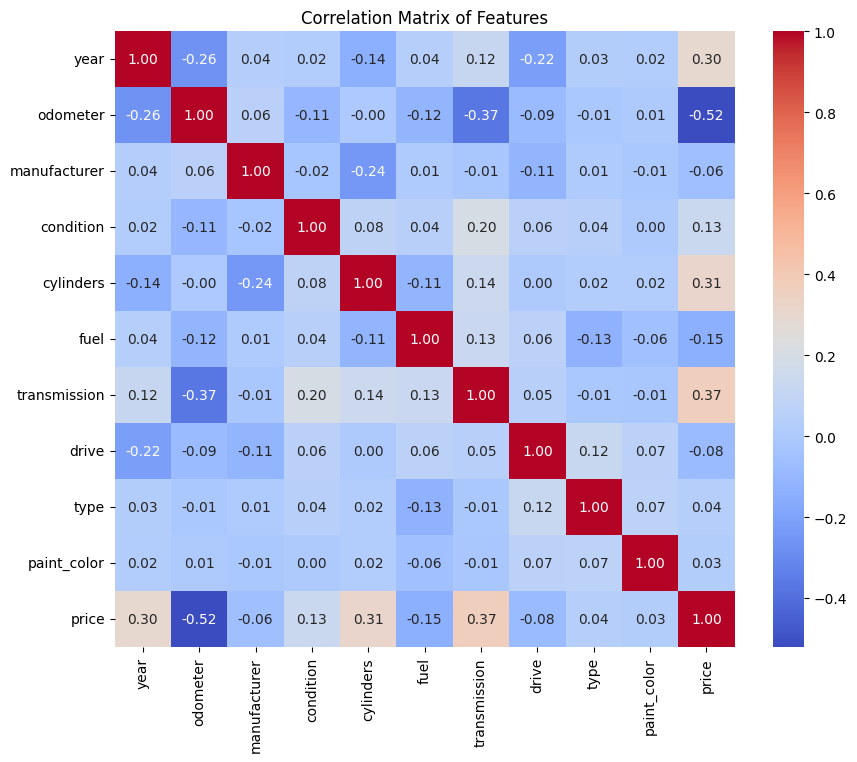

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = final_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

Price and Year: There is a positive correlation between price and year. This suggests that newer manufacturing years are more likely to have higher prices.

Price and Odometer: There is a negative correlation between price and odometer. This indicates that higher mileage is likely associated with lower prices.

Price and Cylinders: There is a positive correlation between price and cylinders. This indicates that more cylinders is likely associated with higher prices.

Other Variables (e.g., Manufacturer, type, color): The correlations with price are relatively weak for these variables.

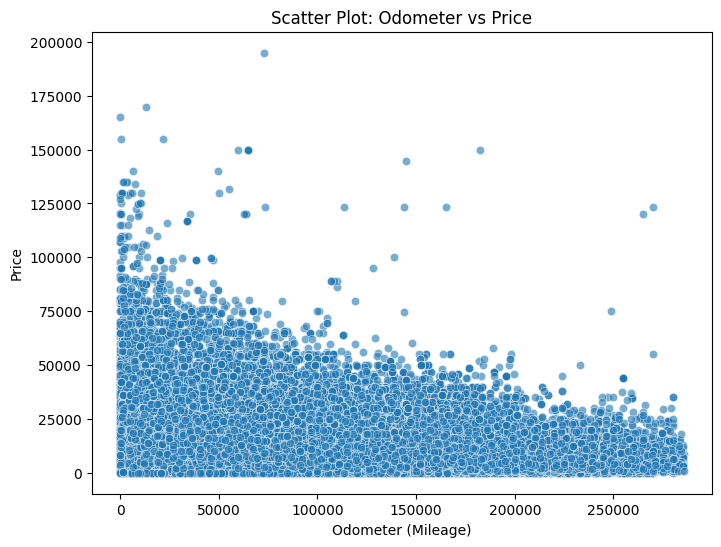

In [24]:
# Scatter plot for 'odometer' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_data, x='odometer', y='price', alpha=0.6)
plt.title("Scatter Plot: Odometer vs Price")
plt.xlabel("Odometer (Mileage)")
plt.ylabel("Price")
plt.ticklabel_format(style='plain', axis='both')
plt.show()

Odometer vs Price (Scatter Plot) Relationship:

As mileage increases, the price tends to decrease

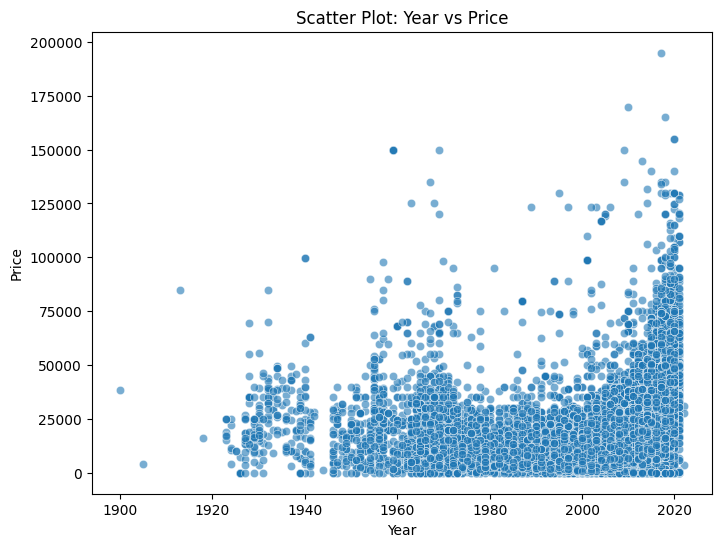

In [25]:
# Scatter plot for 'year' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_data, x='year', y='price', alpha=0.6)
plt.title("Scatter Plot: Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

<ipython-input-26-1081e13e4daf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data_filtered_no_outliers['transmission'], y=data_filtered_no_outliers['price'], ci=None)


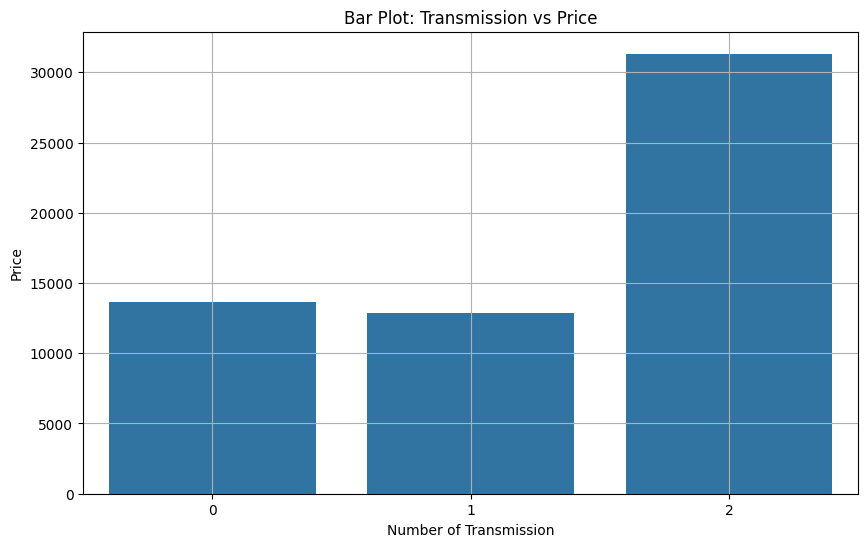

In [26]:
# Scatter plot for 'transmission' vs 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x=data_filtered_no_outliers['transmission'], y=data_filtered_no_outliers['price'], ci=None)
plt.title('Bar Plot: Transmission vs Price')
plt.xlabel('Number of Transmission')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Year vs Price (Scatter Plot) Relationship:

As year increases, the price decreases. While there are some outliers (older vehicles with abnormally high prices), most data points follow a positive correlation between year and price.

<ipython-input-27-7b9804c39b70>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data_filtered_no_outliers['cylinders'], y=data_filtered_no_outliers['price'], ci=None)


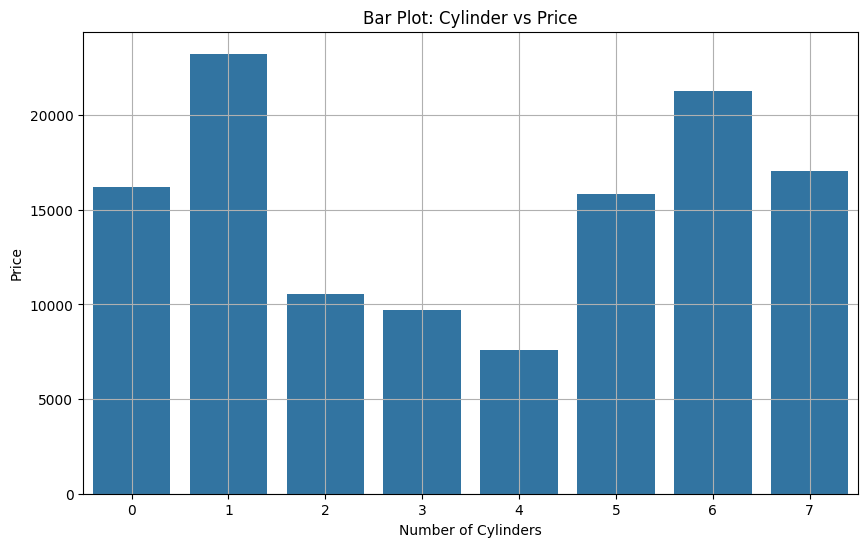

In [27]:
# Bar plot for cylinders vs price
plt.figure(figsize=(10, 6))
sns.barplot(x=data_filtered_no_outliers['cylinders'], y=data_filtered_no_outliers['price'], ci=None)
plt.title('Bar Plot: Cylinder vs Price')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Cylinder vs Price Relationship:

As the number of cylinders increases, the price increases. 0-1 cylinders, however, do not follow the pattern - could imply niche market

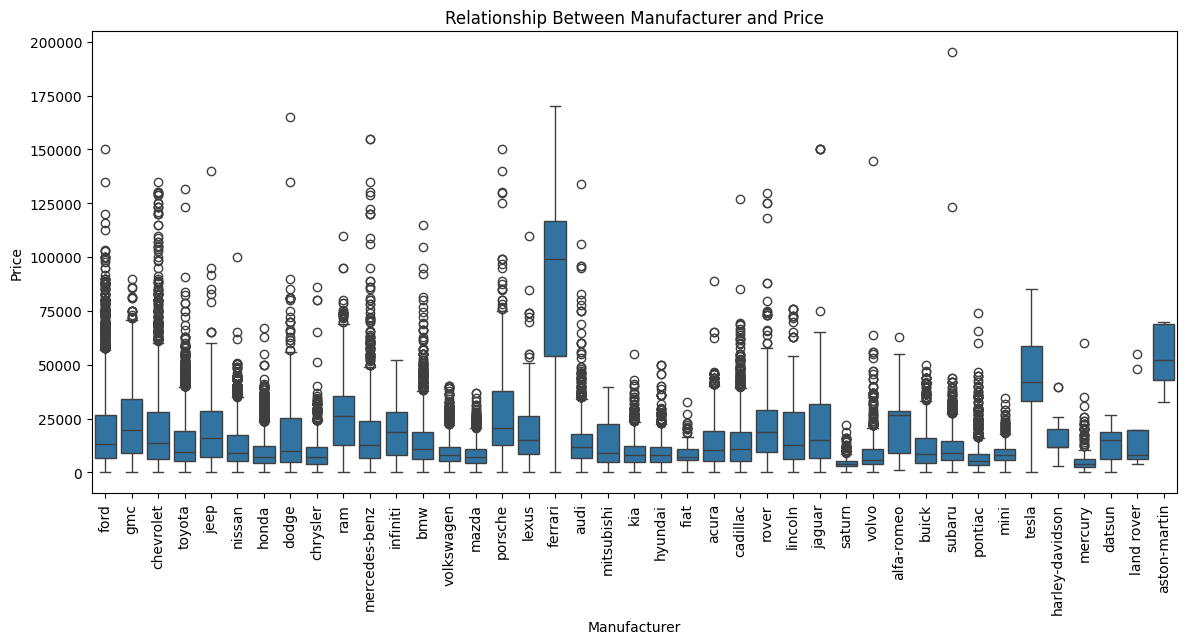

In [28]:
# Decode the 'manufacturer' back to original names using LabelEncoder inverse_transform
inverse_data = final_data.copy()
inverse_data['manufacturer_name'] = label_encoders['manufacturer'].inverse_transform(final_data['manufacturer'])

# Plot the relationship between 'manufacturer_name' and 'price'
plt.figure(figsize=(14, 6))
sns.boxplot(data=inverse_data, x='manufacturer_name', y='price')
plt.xticks(rotation=90)
plt.title("Relationship Between Manufacturer and Price")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.show()

Price Distribution by Manufacturer:

High-Priced Vehicles: Porsche, Mercedes-Benz, Lexus, BMW, etc., generally exhibit higher price ranges.

Low-Priced Vehicles: Kia, Hyundai, Ford, etc., are positioned in relatively lower price ranges.

Mid-Priced Vehicles: Toyota, Honda, Nissan, etc., show a middle price distribution.

# Modelig & Interpretations

In [29]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Initialize scaler
scaler = StandardScaler()

# Features and target
X = final_data[features]

# Scaling
X_scaled = scaler.fit_transform(X)

y = final_data['price']

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [30]:
def evaluate_model(name, model, X_scaled, y, kf):
    # MSE scores
    mse_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
    mse_scores = -mse_scores  # Convert to positive MSE
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    # RMSE scores (calculated from MSE)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    # R-squared score
    r2_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)

    # Return metrics
    return {
        "Mean MSE": mean_mse,
        "Std MSE": std_mse,
        "Mean RMSE": mean_rmse,
        "Std RMSE": std_rmse,
        "Mean R2": mean_r2,
        "Std R2": std_r2
    }

In [31]:
results = {}
results["Linear Regression"] = evaluate_model("Linear Regression", models["Linear Regression"], X_scaled, y, kf)

In [32]:
results["Decision Tree"] = evaluate_model("Decision Tree", models["Decision Tree"], X_scaled, y, kf)

In [33]:
results["Random Forest"] = evaluate_model("Random Forest", models["Random Forest"], X_scaled, y, kf)

In [34]:
results["KNN"] = evaluate_model("KNN", models["KNN"], X_scaled, y, kf)

In [35]:
results["XGBoost"] = evaluate_model("XGBoost", models["XGBoost"], X_scaled, y, kf)

In [36]:
# Print results with formatted output
print("Model Comparison Results:")
print("-" * 80)
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MSE:  {metrics['Mean MSE']:.2f} (±{metrics['Std MSE']:.2f})")
    print(f"RMSE: {metrics['Mean RMSE']:.2f} (±{metrics['Std RMSE']:.2f})")
    print(f"R²:   {metrics['Mean R2']:.4f} (±{metrics['Std R2']:.4f})")
print("-" * 80)

Model Comparison Results:
--------------------------------------------------------------------------------

Linear Regression:
MSE:  95421006.87 (±3762878.43)
RMSE: 9766.46 (±193.23)
R²:   0.4756 (±0.0095)

Decision Tree:
MSE:  58070188.72 (±2622721.44)
RMSE: 7618.41 (±173.24)
R²:   0.6807 (±0.0148)

Random Forest:
MSE:  32198039.91 (±2150808.85)
RMSE: 5671.18 (±189.20)
R²:   0.8230 (±0.0103)

KNN:
MSE:  48147045.34 (±2345532.00)
RMSE: 6936.75 (±168.76)
R²:   0.7354 (±0.0085)

XGBoost:
MSE:  41653722.95 (±2096696.40)
RMSE: 6451.95 (±161.54)
R²:   0.7710 (±0.0098)
--------------------------------------------------------------------------------


In [37]:
# Create a summary DataFrame
summary_data = {
    'Model': [],
    'MSE (mean ± std)': [],
    'RMSE (mean ± std)': [],
    'R² (mean ± std)': []
}

for name, metrics in results.items():
    summary_data['Model'].append(name)
    summary_data['MSE (mean ± std)'].append(f"{metrics['Mean MSE']:.2f} ± {metrics['Std MSE']:.2f}")
    summary_data['RMSE (mean ± std)'].append(f"{metrics['Mean RMSE']:.2f} ± {metrics['Std RMSE']:.2f}")
    summary_data['R² (mean ± std)'].append(f"{metrics['Mean R2']:.4f} ± {metrics['Std R2']:.4f}")

summary_df = pd.DataFrame(summary_data)
print("\nSummary Table:")
print(summary_df.to_string(index=False))


Summary Table:
            Model         MSE (mean ± std) RMSE (mean ± std) R² (mean ± std)
Linear Regression 95421006.87 ± 3762878.43  9766.46 ± 193.23 0.4756 ± 0.0095
    Decision Tree 58070188.72 ± 2622721.44  7618.41 ± 173.24 0.6807 ± 0.0148
    Random Forest 32198039.91 ± 2150808.85  5671.18 ± 189.20 0.8230 ± 0.0103
              KNN 48147045.34 ± 2345532.00  6936.75 ± 168.76 0.7354 ± 0.0085
          XGBoost 41653722.95 ± 2096696.40  6451.95 ± 161.54 0.7710 ± 0.0098


In [38]:
results_df = pd.DataFrame(results).T

In [39]:
results_df

,Mean MSE,Std MSE,Mean RMSE,Std RMSE,Mean R2,Std R2
Linear Regression,9.542101e+07,3.762878e+06,9766.456349,193.228503,0.475605,0.009546
Decision Tree,5.807019e+07,2.622721e+06,7618.410394,173.239090,0.680664,0.014810
Random Forest,3.219804e+07,2.150809e+06,5671.176662,189.196138,0.823043,0.010280
KNN,4.814705e+07,2.345532e+06,6936.754720,168.758092,0.735419,0.008506
XGBoost,4.165372e+07,2.096696e+06,6451.947708,161.535505,0.771025,0.009816


Random Forest has the lowest RMSE and MSE, potentially making it the best model. XGBoost seems to be the second best model, and Linear Regression seems to be the worst performing model.

<ipython-input-40-432d6f3c470d>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df,
<ipython-input-40-432d6f3c470d>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df,
<ipython-input-40-432d6f3c470d>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df,
<ipython-input-40-432d6f3c470d>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp

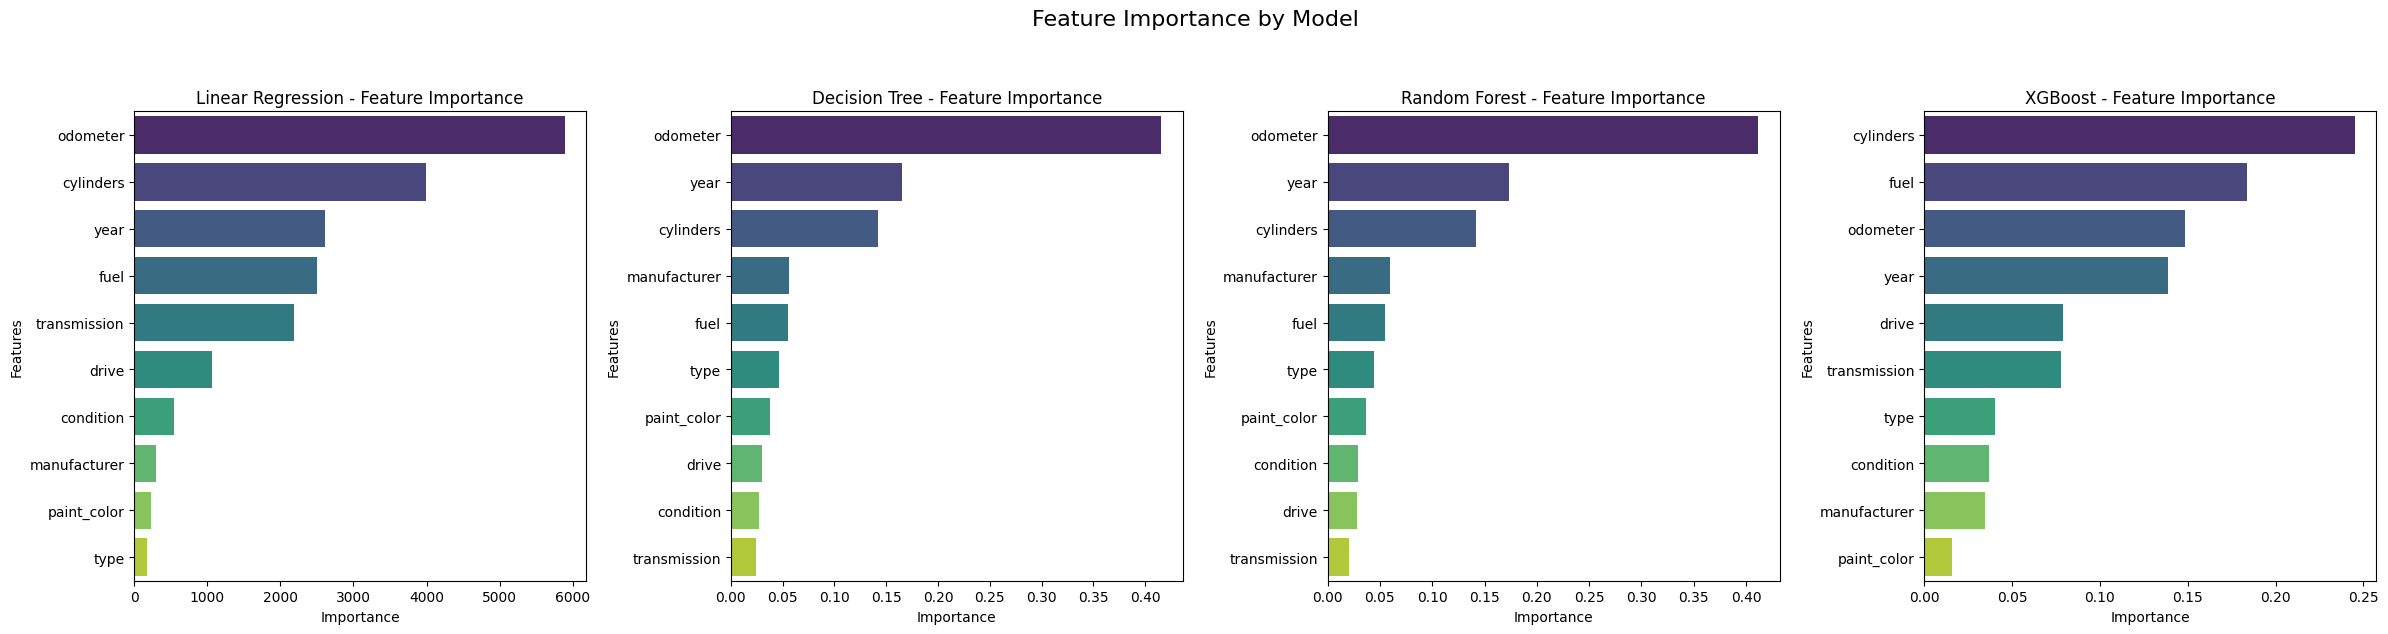

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_feature_importance(models, X, y, features):
    # Dictionary to store feature importances
    feature_importances = {}

    # Fit models and get feature importances
    for name, model in models.items():
        # Skip KNN as it doesn't provide feature importance
        if name == "KNN":
            continue

        # Fit the model
        model.fit(X, y)

        if name == "Linear Regression":
            # For linear regression, use absolute coefficients
            importances = np.abs(model.coef_)
        elif name in ["Random Forest", "XGBoost", "Decision Tree"]:
            # For tree-based models, use feature_importances_
            importances = model.feature_importances_

        # Store importances in dictionary
        feature_importances[name] = importances

    # Create subplots
    fig, axes = plt.subplots(1, len(feature_importances), figsize=(24, 6))
    fig.suptitle('Feature Importance by Model', fontsize=16, y=1.05)

    # Plot for each model
    for idx, (name, importances) in enumerate(feature_importances.items()):
        # Create DataFrame for plotting
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': importances
        })

        # Sort by importance
        importance_df = importance_df.sort_values('Importance', ascending=False)

        # Create bar plot
        sns.barplot(data=importance_df,
                    x='Importance',
                    y='Feature',
                    ax=axes[idx],
                    palette='viridis')

        axes[idx].set_title(f'{name} - Feature Importance')
        axes[idx].set_xlabel('Importance')
        axes[idx].set_ylabel('Features')

    plt.tight_layout()
    plt.show()

# Plot feature importance for all models (excluding KNN)
plot_feature_importance(models, X_scaled, y, features)


In [41]:
'''
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grids
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X, y)
best_rf_params = rf_grid_search.best_params_
best_rf_rmse = np.sqrt(-rf_grid_search.best_score_)

# GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X, y)
best_xgb_params = xgb_grid_search.best_params_
best_xgb_rmse = np.sqrt(-xgb_grid_search.best_score_)

# Display the best parameters and RMSE
optimization_results = {
    "Random Forest": {"Best Params": best_rf_params, "Best RMSE": best_rf_rmse},
    "XGBoost": {"Best Params": best_xgb_params, "Best RMSE": best_xgb_rmse}
}
'''

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [42]:
print(optimization_results)

{'Random Forest': {'Best Params': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Best RMSE': 7333.8416621156875}, 'XGBoost': {'Best Params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}, 'Best RMSE': 7135.561027095826}}


# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X, y)

# Get the best parameters and RMSE for Random Forest
best_rf_params = rf_grid_search.best_params_
best_rf_rmse = np.sqrt(-rf_grid_search.best_score_)

# Display Random Forest results
rf_optimization_results = {
    "Best Params": best_rf_params,
    "Best RMSE": best_rf_rmse
}

print("Random Forest Optimization Results:", rf_optimization_results)

Random Forest Optimization Results: {'Best Params': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Best RMSE': 7333.8416621156875}


In [ ]:

# Define hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Perform GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X, y)

# Get the best parameters and RMSE for XGBoost
best_xgb_params = xgb_grid_search.best_params_
best_xgb_rmse = np.sqrt(-xgb_grid_search.best_score_)

# Display XGBoost results
xgb_optimization_results = {
    "Best Params": best_xgb_params,
    "Best RMSE": best_xgb_rmse
}

print("XGBoost Optimization Results:", xgb_optimization_results)


XGBoost Optimization Results: {'Best Params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}, 'Best RMSE': 7135.561027095826}


# Models for Macroeconomic variables

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

used_car_prices = pd.read_csv('https://raw.githubusercontent.com/sg7667/DBFinal/refs/heads/main/Used_car_prices.csv')
unemployment_rate = pd.read_csv('https://raw.githubusercontent.com/sg7667/DBFinal/refs/heads/main/Unemployment_rate.csv')
consumer_sentiment = pd.read_csv('https://raw.githubusercontent.com/sg7667/DBFinal/refs/heads/main/Consumer_sentiment.csv')
auto_inventory = pd.read_csv('https://raw.githubusercontent.com/sg7667/DBFinal/refs/heads/main/Auto_invent.csv')

In [4]:
# Convert DATE columns to datetime format
used_car_prices['DATE'] = pd.to_datetime(used_car_prices['DATE'])
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])
consumer_sentiment['DATE'] = pd.to_datetime(consumer_sentiment['DATE'])
auto_inventory['DATE'] = pd.to_datetime(auto_inventory['DATE'])

# Convert Inventory to numeric
auto_inventory['Inventory'] = pd.to_numeric(auto_inventory['Inventory'], errors='coerce')

# Merge datasets on DATE
merged_data = pd.merge(used_car_prices, unemployment_rate, on='DATE', how='inner')
merged_data = pd.merge(merged_data, consumer_sentiment, on='DATE', how='inner')
merged_data = pd.merge(merged_data, auto_inventory, on='DATE', how='inner')

# Check the resulting dataset
merged_data_info = merged_data.info()
missing_values_merged = merged_data.isnull().sum()
merged_data_sample = merged_data.head()

merged_data_info, missing_values_merged, merged_data_sample


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                127 non-null    datetime64[ns]
 1   Used Car Prices     127 non-null    float64       
 2   Unemployment Rate   127 non-null    float64       
 3   Consumer Sentiment  127 non-null    float64       
 4   Inventory           127 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.1 KB


(None,
 DATE                  0
 Used Car Prices       0
 Unemployment Rate     0
 Consumer Sentiment    0
 Inventory             0
 dtype: int64,
         DATE  Used Car Prices  Unemployment Rate  Consumer Sentiment  \
 0 1993-01-01        212.06030                7.0                85.9   
 1 1993-04-01        224.95812                7.0                81.5   
 2 1993-07-01        232.32831                6.7                77.9   
 3 1993-10-01        233.33333                6.5                88.2   
 4 1994-01-01        223.78559                6.5                91.5   
 
    Inventory  
 0     1420.9  
 1     1415.8  
 2     1390.7  
 3     1377.3  
 4     1381.0  )

In [6]:
merged_data = merged_data.dropna()

In [7]:
merged_data

,DATE,Used Car Prices,Unemployment Rate,Consumer Sentiment,Inventory
0,1993-01-01,212.06030,7.0,85.9,1420.900
1,1993-04-01,224.95812,7.0,81.5,1415.800
2,1993-07-01,232.32831,6.7,77.9,1390.700
3,1993-10-01,233.33333,6.5,88.2,1377.300
4,1994-01-01,223.78559,6.5,91.5,1381.000
...,...,...,...,...,...
122,2023-07-01,314.32161,3.8,67.8,199.396
123,2023-10-01,319.21273,3.7,69.7,226.074
124,2024-01-01,306.60302,3.8,79.4,237.585
125,2024-04-01,299.54941,4.1,68.2,246.933


In [8]:
# Correlation
correlation_matrix = merged_data[["Used Car Prices","Consumer Sentiment", "Unemployment Rate", "Inventory"]].corr()

correlation_matrix

,Used Car Prices,Consumer Sentiment,Unemployment Rate,Inventory
Used Car Prices,1.000000,-0.344053,-0.362344,-0.563530
Consumer Sentiment,-0.344053,1.000000,-0.393401,0.619658
Unemployment Rate,-0.362344,-0.393401,1.000000,0.056295
Inventory,-0.563530,0.619658,0.056295,1.000000


# EDA


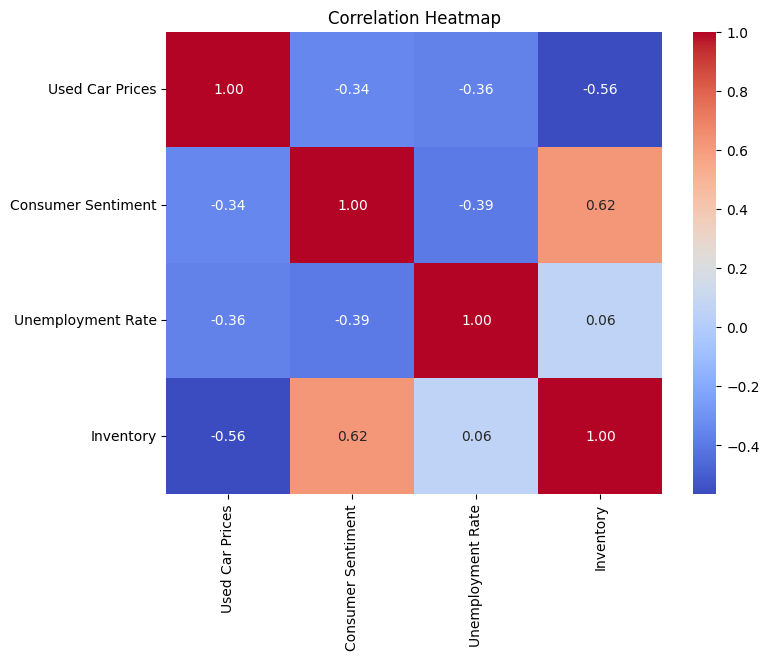

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Used Car Prices vs Unemployment Rate')

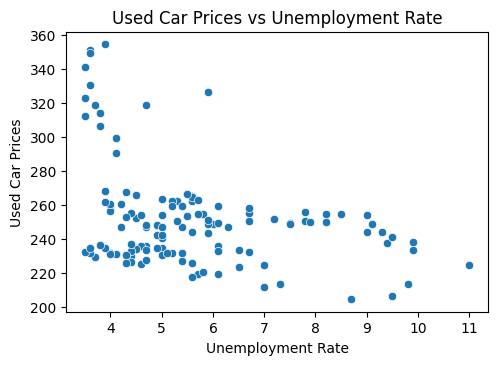

In [10]:
# Scatter plots for individual relationships
plt.figure(figsize=(12, 8))

# Used Car Prices vs Unemployment Rate
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_data, x="Unemployment Rate", y="Used Car Prices")
plt.title("Used Car Prices vs Unemployment Rate")

Text(0.5, 1.0, 'Used Car Prices vs Consumer Sentiment')

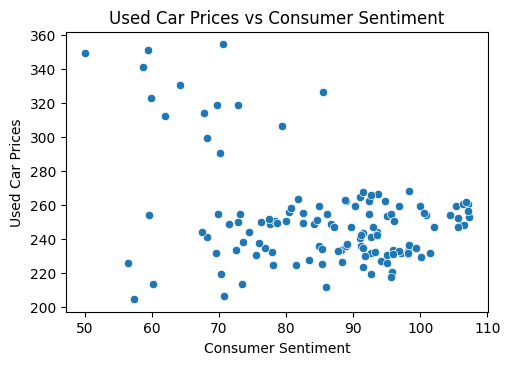

In [11]:
# Scatter plots for individual relationships
plt.figure(figsize=(12, 8))
# Used Car Prices vs Consumer Sentiment
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_data, x="Consumer Sentiment", y="Used Car Prices")
plt.title("Used Car Prices vs Consumer Sentiment")

Text(0.5, 1.0, 'Used Car Prices vs Inventory')

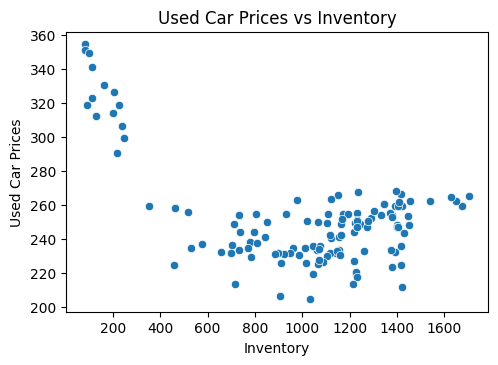

In [12]:
# Scatter plots for individual relationships
plt.figure(figsize=(12, 8))
# Used Car Prices vs Inventory
plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_data, x="Inventory", y="Used Car Prices")
plt.title("Used Car Prices vs Inventory")

# Modelig & Interpretations



Linear Regression Results:
R2 Score: 0.4665
MSE: 377.7825
Cross-validation R2: 0.2087 (±0.4948)

Random Forest Results:
R2 Score: 0.7589
MSE: 170.7630
Cross-validation R2: 0.7405 (±0.1695)

Feature Importance:
Unemployment Rate: 0.0685
Consumer Sentiment: 0.0503
Inventory: 0.8812

XGBoost Results:
R2 Score: 0.7781
MSE: 157.1315
Cross-validation R2: 0.7211 (±0.1166)

Feature Importance:
Unemployment Rate: 0.0543
Consumer Sentiment: 0.0495
Inventory: 0.8962


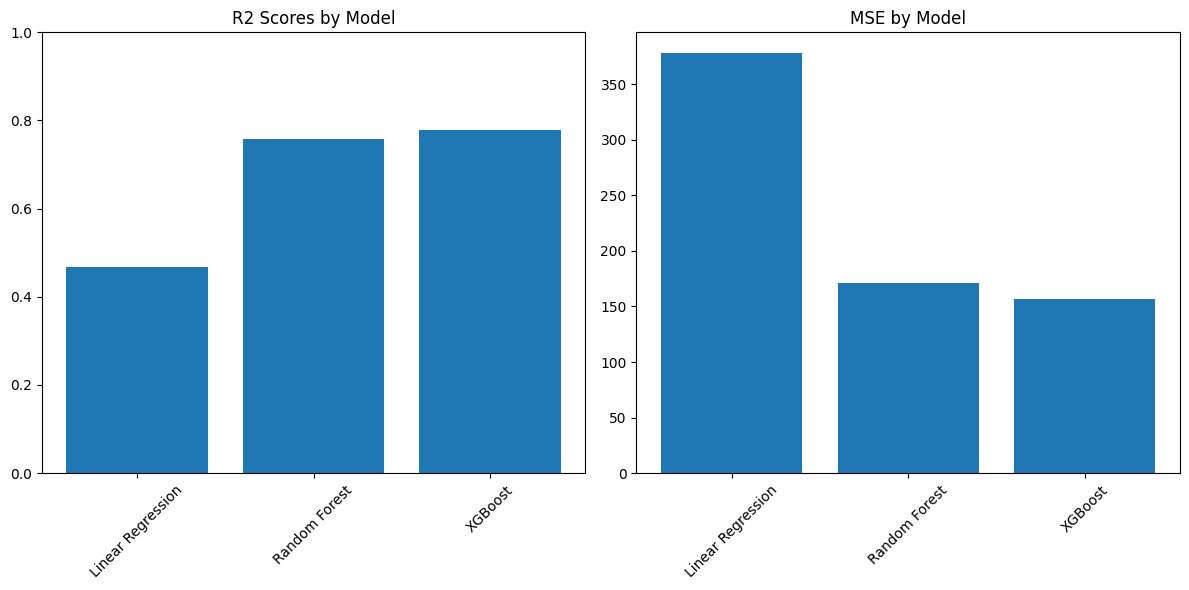

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data preprocessing
scaler = StandardScaler()
X = merged_data[['Unemployment Rate', 'Consumer Sentiment', 'Inventory']]
y = merged_data['Used Car Prices']

# Scale features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, verbosity=0)
}

# Results dictionary
results = {}

for model_name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "MSE": mse,
        "R2": r2,
        "CV_R2_mean": cv_scores.mean(),
        "CV_R2_std": cv_scores.std()
    }

    # Feature importance (for tree-based models)
    if model_name in ["Random Forest", "XGBoost"]:
        importances = model.feature_importances_
        results[model_name]["Feature_Importance"] = dict(zip(X.columns, importances))

# Visualize results
def plot_model_comparison(results):
    plt.figure(figsize=(12, 6))

    # R2 scores comparison
    plt.subplot(1, 2, 1)
    r2_scores = [results[model]["R2"] for model in models.keys()]
    plt.bar(models.keys(), r2_scores)
    plt.title('R2 Scores by Model')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # MSE comparison
    plt.subplot(1, 2, 2)
    mse_scores = [results[model]["MSE"] for model in models.keys()]
    plt.bar(models.keys(), mse_scores)
    plt.title('MSE by Model')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Print detailed results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"R2 Score: {metrics['R2']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"Cross-validation R2: {metrics['CV_R2_mean']:.4f} (±{metrics['CV_R2_std']:.4f})")

    if "Feature_Importance" in metrics:
        print("\nFeature Importance:")
        for feature, importance in metrics["Feature_Importance"].items():
            print(f"{feature}: {importance:.4f}")

plot_model_comparison(results)

<ipython-input-14-c1b8d73a3f67>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance, x='Importance', y='Feature',
<ipython-input-14-c1b8d73a3f67>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance, x='Importance', y='Feature',


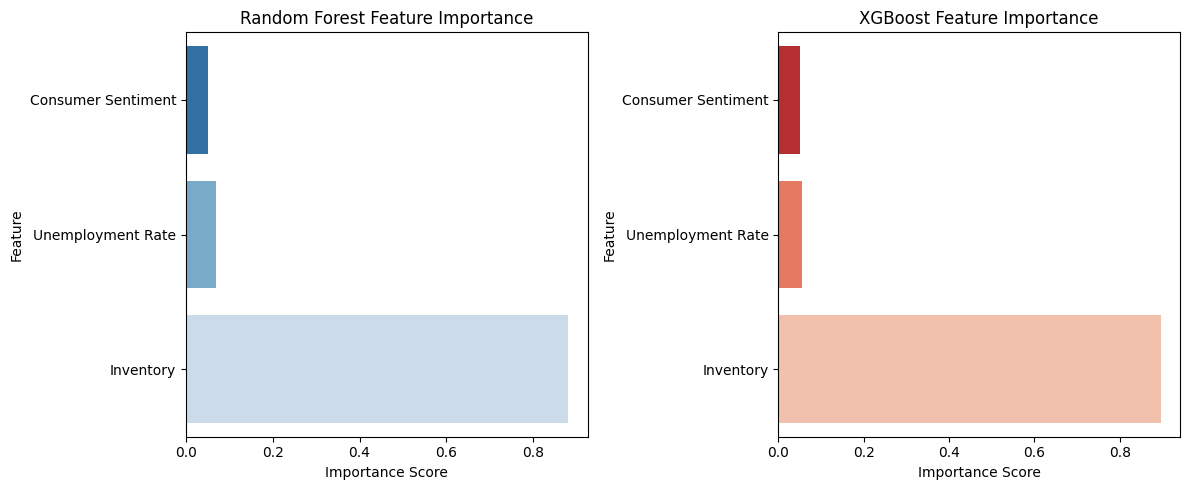


Random Forest Feature Importance:
           Feature  Importance
         Inventory    0.881201
 Unemployment Rate    0.068454
Consumer Sentiment    0.050346

XGBoost Feature Importance:
           Feature  Importance
         Inventory    0.896192
 Unemployment Rate    0.054280
Consumer Sentiment    0.049529


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_importance(results, figsize=(12, 5)):
    # Create figure with two subplots for Random Forest and XGBoost
    plt.figure(figsize=figsize)

    # Plot for Random Forest
    plt.subplot(1, 2, 1)
    rf_importance = pd.DataFrame({
        'Feature': results['Random Forest']['Feature_Importance'].keys(),
        'Importance': results['Random Forest']['Feature_Importance'].values()
    })
    rf_importance = rf_importance.sort_values('Importance', ascending=True)

    sns.barplot(data=rf_importance, x='Importance', y='Feature',
                palette='Blues_r')
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Importance Score')

    # Plot for XGBoost
    plt.subplot(1, 2, 2)
    xgb_importance = pd.DataFrame({
        'Feature': results['XGBoost']['Feature_Importance'].keys(),
        'Importance': results['XGBoost']['Feature_Importance'].values()
    })
    xgb_importance = xgb_importance.sort_values('Importance', ascending=True)

    sns.barplot(data=xgb_importance, x='Importance', y='Feature',
                palette='Reds_r')
    plt.title('XGBoost Feature Importance')
    plt.xlabel('Importance Score')

    plt.tight_layout()
    plt.show()

def print_feature_importance(results):
    print("\nRandom Forest Feature Importance:")
    rf_importance = pd.DataFrame({
        'Feature': results['Random Forest']['Feature_Importance'].keys(),
        'Importance': results['Random Forest']['Feature_Importance'].values()
    }).sort_values('Importance', ascending=False)

    print(rf_importance.to_string(index=False))

    print("\nXGBoost Feature Importance:")
    xgb_importance = pd.DataFrame({
        'Feature': results['XGBoost']['Feature_Importance'].keys(),
        'Importance': results['XGBoost']['Feature_Importance'].values()
    }).sort_values('Importance', ascending=False)

    print(xgb_importance.to_string(index=False))

plot_feature_importance(results)
print_feature_importance(results)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Data preprocessing
scaler = StandardScaler()
X = merged_data[['Unemployment Rate', 'Consumer Sentiment', 'Inventory']]
y = merged_data['Used Car Prices']

# Scale features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,acolumns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Perform GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3,
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

# Best parameters and RMSE during GridSearchCV
best_xgb_params = xgb_grid_search.best_params_
best_xgb_rmse = np.sqrt(-xgb_grid_search.best_score_)

# Final Evaluation on Test Set
best_xgb_model = xgb_grid_search.best_estimator_  # Best model from GridSearchCV
y_pred_test = best_xgb_model.predict(X_test)

# Calculate Test RMSE and R2 Score
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_test)

# Display Results
print("XGBoost Optimization Results:")
print(f"Best Parameters: {best_xgb_params}")
print(f"Best RMSE from GridSearchCV: {best_xgb_rmse:.4f}")

print("\nXGBoost Final Evaluation on Test Set:")
print(f"RMSE: {test_rmse:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"R2 Score: {test_r2:.4f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
XGBoost Optimization Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best RMSE from GridSearchCV: 15.7163

XGBoost Final Evaluation on Test Set:
RMSE: 12.0812
MSE: 145.9565
R2 Score: 0.7939
